# Visualize the performed benchmarks

**Note**: Error visualization for rust is not implemented yet!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# settings
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
# Save figures as png? 
save_figs = True

#FIGNAME = "Benchmark_23_01_07"

## Define Filenames 

# with native python code
FILENAME_py = "results/py_benchmark_results.csv" 
# with numba
#FILENAME_nu = "results/numba_benchmark_results.csv" 
FILENAME_nu = "results/numba_mamba_benchmark_results.csv" 
# with transonic
FILENAME_tr = "results/transonic_mamba_benchmark_results.csv" 
# with native rust code
Filename_ru = "results/rust_benchmark_results.csv" 

In [3]:
# import python result values
df_py = pd.read_csv(FILENAME_py)

# import numba result values
df_nu = pd.read_csv(FILENAME_nu)

# import transonic result values
df_tr = pd.read_csv(FILENAME_tr)

# import rust result values
df_ru = pd.read_csv(Filename_ru)

In [6]:
df_py

,N,t_FRLT,e_FRLT_max,e_rel_FRLT_max,t_G1,e_G1_max,e_rel_G1_max,t_R1,e_R1_max,e_rel_R1_max
0,1000,0.034001,0.022443,0.008927,0.218000,0.030308,0.009730,0.633000,0.060616,0.260852
1,2500,0.085998,0.052602,0.003102,1.339516,0.012123,0.003892,4.016000,0.024246,0.268284
2,5000,0.166178,0.070476,0.002326,5.385300,0.006062,0.001946,16.051703,0.012123,0.270762
3,7500,0.254000,0.080245,0.002648,12.413997,0.004041,0.001297,36.191319,0.008082,0.271588
4,10000,0.347999,0.087141,0.002875,21.605939,0.003031,0.000973,64.269072,0.006062,0.272001
5,12500,0.426997,0.092630,0.003056,34.408761,0.002425,0.000778,100.522201,0.004849,0.272248
6,15000,0.517973,0.097284,0.003210,49.198216,0.002021,0.000649,144.969608,0.004041,0.272414
7,20000,0.682999,0.105029,0.003472,87.637167,0.001515,0.000486,257.883517,0.003031,0.272620


In [7]:
df_tr

,N,t_FRLT,e_FRLT_max,e_rel_FRLT_max,t_G1,e_G1_max,e_rel_G1_max,t_R1,e_R1_max,e_rel_R1_max
0,1000,0.000284,0.022443,0.008927,0.001282,0.030308,0.009730,0.027468,0.060616,0.260852
1,2500,0.000481,0.052602,0.003102,0.007794,0.012123,0.003892,0.172161,0.024246,0.268284
2,5000,0.000950,0.070476,0.002326,0.030528,0.006062,0.001946,0.685809,0.012123,0.270762
3,7500,0.001443,0.080245,0.002648,0.068729,0.004041,0.001297,1.546269,0.008082,0.271588
4,10000,0.001729,0.087141,0.002875,0.122167,0.003031,0.000973,2.750386,0.006062,0.272001
5,12500,0.001908,0.092630,0.003056,0.191018,0.002425,0.000778,4.307166,0.004849,0.272248
6,15000,0.002256,0.097284,0.003210,0.275053,0.002021,0.000649,6.269371,0.004041,0.272414
7,20000,0.003029,0.105029,0.003472,0.489049,0.001515,0.000486,11.045477,0.003031,0.272620


In [50]:
# Column entries
col_lst = ['t_FRLT','e_FRLT_max','e_rel_FRLT_max',
           't_G1','e_G1_max','e_rel_G1_max',
           't_R1','e_R1_max', 'e_rel_R1_max']
# Methods (short)
mtd_lst = ['py','nu','tr','ru']
# Methods (long)
method_lst = ['Pyhton','Numba','Transonic','Rust']

df = pd.DataFrame()
df['N'] = df_py['N']
for i in range(len(col_lst)):
    ## import from
    # python
    df = df.join(df_py[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[0]])})
    # numba
    df = df.join(df_nu[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[1]])})
    # transonic
    df = df.join(df_tr[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[2]])})
    # rust
    df = df.join(df_ru[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[3]])})
#print(df)

# Plot results 

In [51]:
# create lists for times and errors
# Times
t_lst = []        # (short)
t_method_lst = [] # (long)
for i in range(0,len(col_lst),3):
    for j in range(len(mtd_lst)):
        t_lst.append(''.join([col_lst[i],'_',mtd_lst[j]]))
        t_method_lst.append(''.join([col_lst[i],' ',method_lst[j]]))

# errors
e_lst = []        # (short)
e_method_lst = [] # (long)
for i in range(1,len(col_lst),3):
    for j in range(len(mtd_lst)):
        e_lst.append(''.join([col_lst[i],'_',mtd_lst[j]]))
        e_method_lst.append(''.join([col_lst[i],' ',method_lst[j]]))

# relative errors
e_rel_lst = []        # (short)
e_rel_method_lst = [] # (long)
for i in range(2,len(col_lst),3):
    for j in range(len(mtd_lst)):
        e_rel_lst.append(''.join([col_lst[i],'_',mtd_lst[j]]))
        e_rel_method_lst.append(''.join([col_lst[i],' ',method_lst[j]]))

In [52]:
## Define colour and symbols for plots
# colour for differen algorithms 
#   FRTLT , G1 , R1
col = ['g','b','r']
# symbol for different approachees
#       py , nu , tr , ru 
sym = ['.:','x:','+:','d:']

# create list of all variations
sym_lst = []
for i in range(len(col)):
    for j in range(len(sym)):
        sym_lst.append(''.join([col[i],sym[j]]))

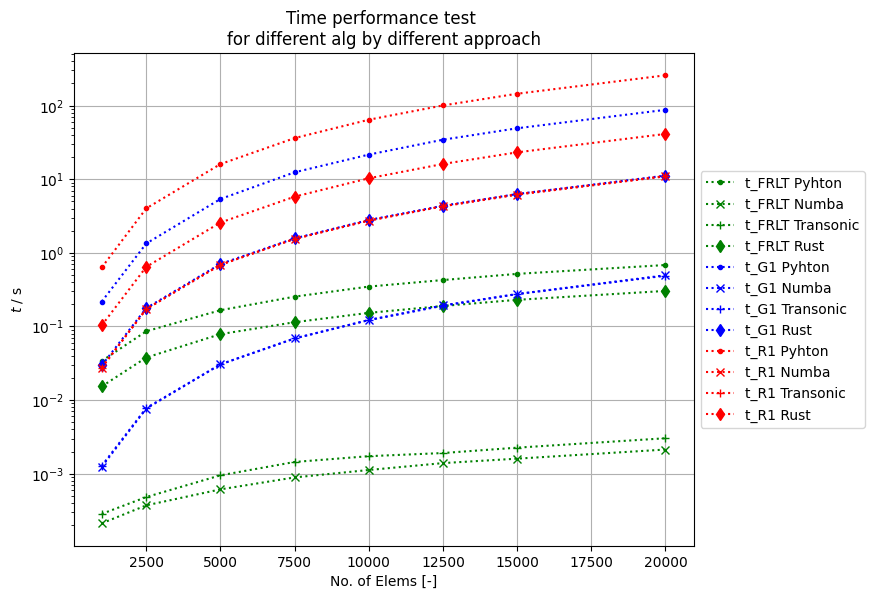

In [53]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)
   
for i in range(len(t_lst)):   
    ax.semilogy(df_py['N'], df[t_lst[i]],
                sym_lst[i],
                label=t_method_lst[i])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Time performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('$\it{t}$ / s')
plt.grid(visible=True)

plt.show()

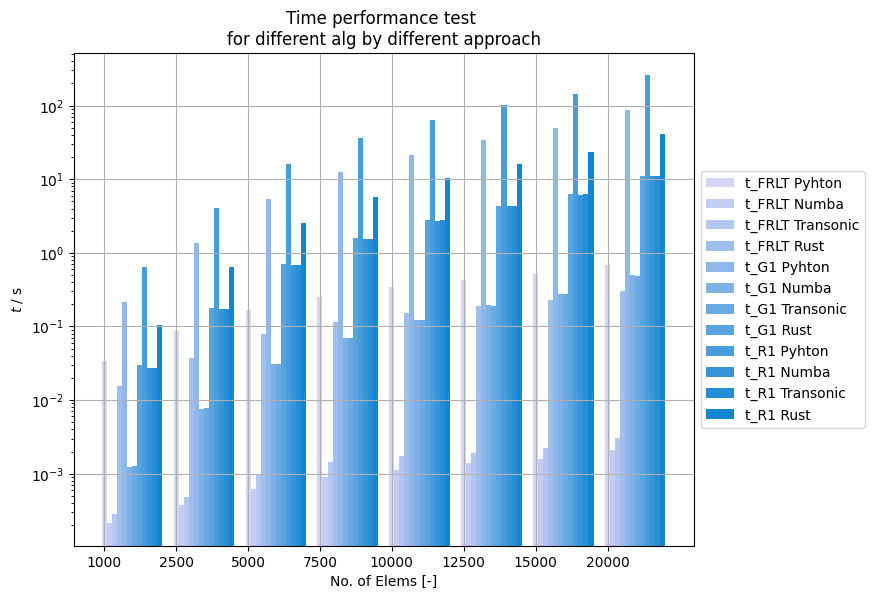

In [54]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)

x = np.arange(len(df['N']))
width = 0.07 # the width of the bars

for i in range(len(t_lst)):
    ax.bar(x+i*width, df[t_lst[i]], width,
        label=t_method_lst[i],
        color=tuple(c/360 for c in (300-(i)*25,300-(i)*10,350-(i)*5)))

ax.set_xticks(x, df_py['N'])
ax.set_yscale('log')
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Time performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('$\it{t}$ / s')
plt.grid(visible=True)
#if save_figs:
#    plt.savefig(''.join(['images/',FIGNAME,'_time_python.png']), dpi=600)
plt.show()

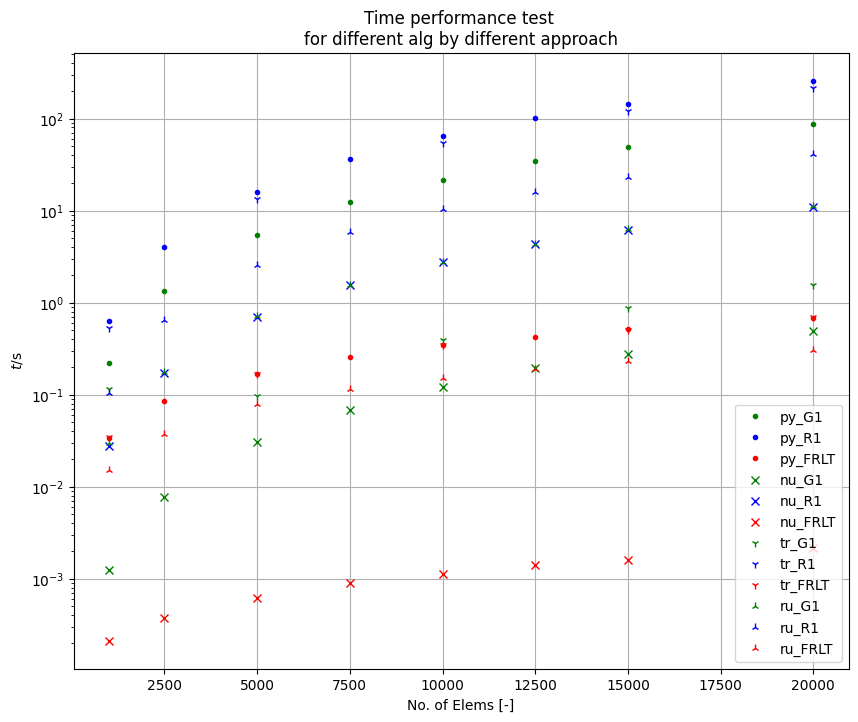

In [42]:
## Plot performance test for each alg and each approach
#fig = plt.figure()
#ax = plt.subplot(111)


plt.semilogy(df_py['N'],df_py['t_G1'],'g.',
            df_py['N'],df_py['t_R1'],'b.',
            df_py['N'],df_py['t_FRLT'],'r.',
            df_nu['N'],df_nu['t_G1'],'gx',
            df_nu['N'],df_nu['t_R1'],'bx',
            df_nu['N'],df_nu['t_FRLT'],'rx',
            df_tr['N'],df_tr['t_G1'],'g1',
            df_tr['N'],df_tr['t_R1'],'b1', 
            df_tr['N'],df_tr['t_FRLT'],'r1',
            df_ru['N'],df_ru['t_G1'],'g2',
            df_ru['N'],df_ru['t_R1'],'b2', 
            df_ru['N'],df_ru['t_FRLT'],'r2')

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Time performance test \nfor different alg by different approach')

plt.legend(['py_G1','py_R1','py_FRLT',
            'nu_G1','nu_R1','nu_FRLT',
            'tr_G1','tr_R1','tr_FRLT',
            'ru_G1','ru_R1','ru_FRLT'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('$\it{t}$/s')
plt.grid(visible=True)
#if save_figs:
#    plt.savefig(''.join(['images/',FIGNAME,'_time_python.png']), dpi=600)
plt.show()

In [43]:
## Plot absolute error vs elems for each alg and each approach
plt.loglog(df_py['N'],df_py['e_G1_max'], df_nu['N'],df_nu['e_G1_max'], df_tr['N'],df_tr['e_G1_max'], df_Ru['N'],df_Ru['e_G1_max'],
         df_py['N'],df_py['e_R1_max'], df_nu['N'],df_nu['e_R1_max'], df_tr['N'],df_tr['e_R1_max'], df_Ru['N'],df_Ru['e_R1_max'],
         df_py['N'],df_py['e_FRLT_max'], df_nu['N'],df_nu['e_FRLT_max'], df_tr['N'],df_tr['e_FRLT_max'], df_Ru['N'],df_Ru['e_FRLT_max'])

plt.title('Max absolute error vs no. of elem \nfor different alg by different approaches')
plt.legend(['G1 Python', 'G1 Numba', 'G1 Transonic', 'G1 Rust',
            'R1 Python', 'R1 Numba', 'R1 Transonic','R1 Rust',
            'FRLT Python', 'FRLT Numba', 'FRLT Transonic', 'FRLT Rust'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('Absolute Error [-]')
plt.grid(visible=True)
if save_figs:
    plt.savefig(''.join(['images/',FIGNAME,'_abs_err.png']), dpi=600)
plt.show()

NameError: name 'df_Ru' is not defined

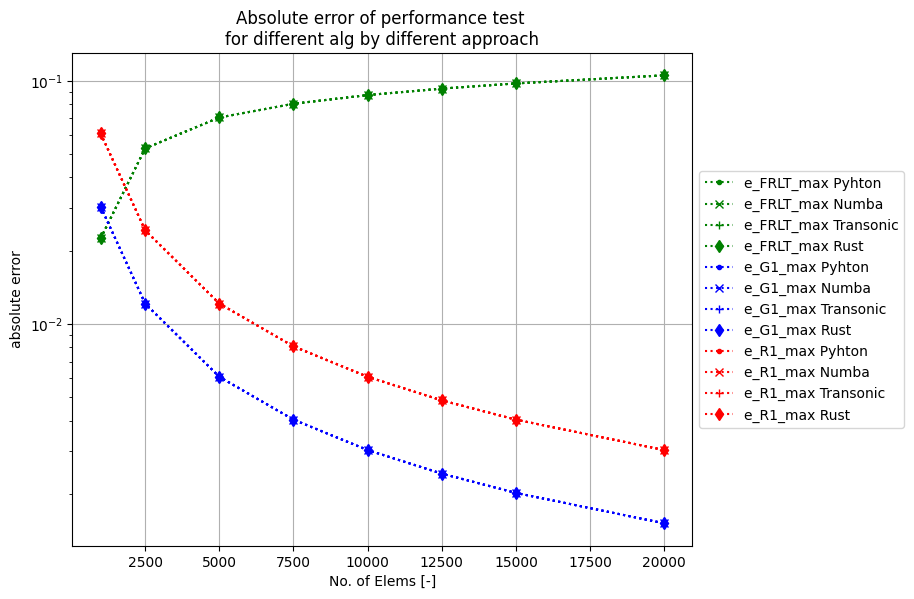

In [55]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)
   
for i in range(len(t_lst)):   
    ax.semilogy(df_py['N'], df[e_lst[i]],
                sym_lst[i],
                label=e_method_lst[i])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Absolute error of performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('absolute error')
plt.grid(visible=True)

plt.show()

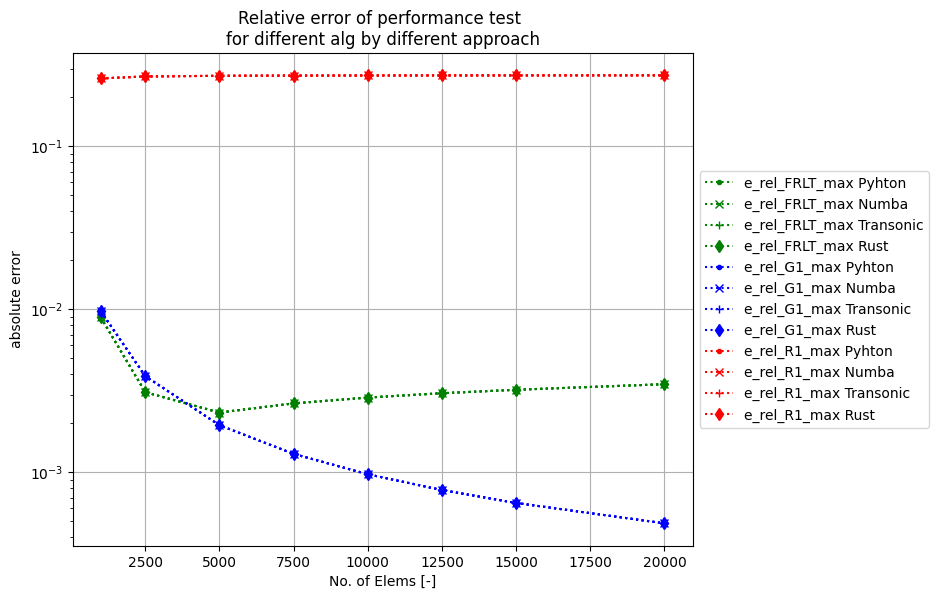

In [56]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)
   
for i in range(len(t_lst)):   
    ax.semilogy(df_py['N'], df[e_rel_lst[i]],
                sym_lst[i],
                label=e_rel_method_lst[i])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Relative error of performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('absolute error')
plt.grid(visible=True)

plt.show()

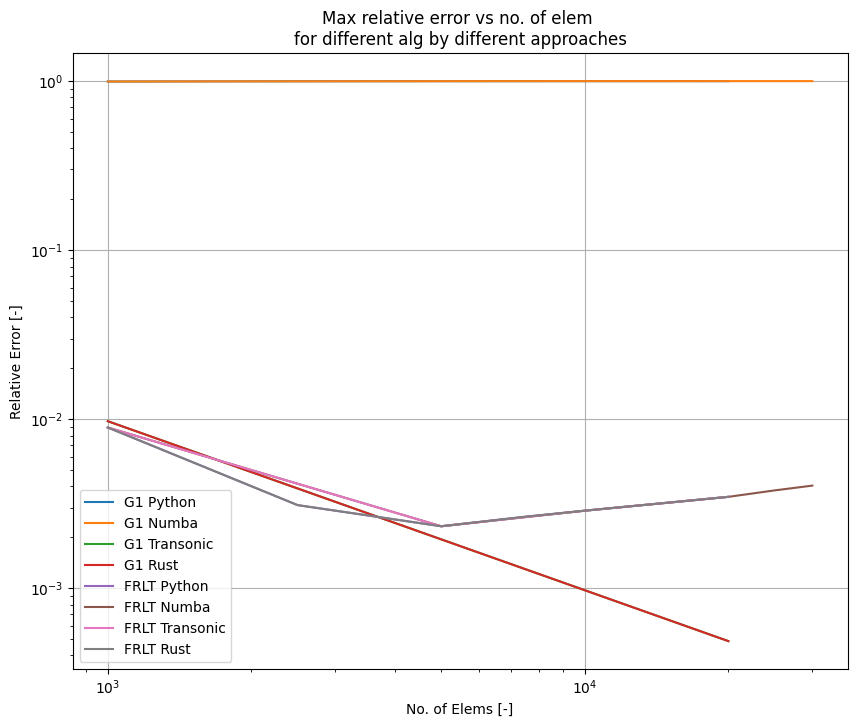

In [330]:
## Plot absolute error vs elems for each alg and each approach
plt.loglog(df_py['N'],df_py['e_rel_G1_max'], df_nu['N'],df_nu['e_rel_G1_max'], df_tr['N'],df_tr['e_rel_G1_max'],df_ru['N'],df_ru['e_rel_G1_max'],
           df_py['N'],df_py['e_rel_FRLT_max'], df_nu['N'],df_nu['e_rel_FRLT_max'], df_tr['N'],df_tr['e_rel_FRLT_max'], df_ru['N'],df_ru['e_rel_FRLT_max'])

plt.title('Max relative error vs no. of elem \nfor different alg by different approaches')
plt.legend(['G1 Python', 'G1 Numba', 'G1 Transonic','G1 Rust',
            'FRLT Python', 'FRLT Numba', 'FRLT Transonic','FRLT Rust'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('Relative Error [-]')
plt.grid(visible=True)

plt.show()

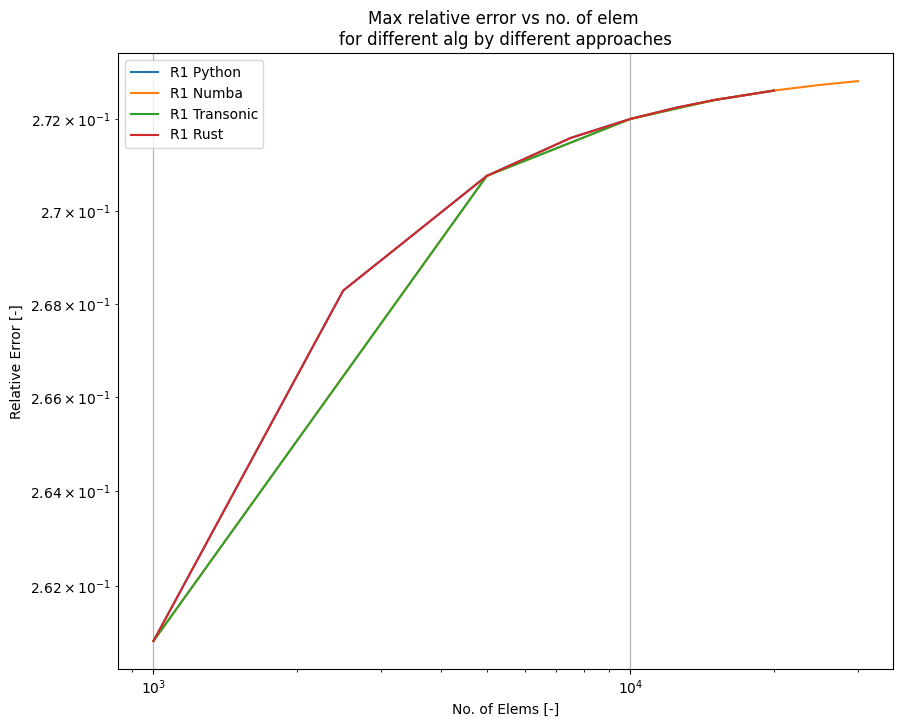

In [333]:
## Plot absolute error vs elems for each alg and each approach
plt.loglog(df_py['N'],df_py['e_rel_R1_max'], df_nu['N'],df_nu['e_rel_R1_max'], df_tr['N'],df_tr['e_rel_R1_max'], df_ru['N'],df_ru['e_rel_R1_max'])

plt.title('Max relative error vs no. of elem \nfor different alg by different approaches')
plt.legend(['R1 Python', 'R1 Numba', 'R1 Transonic', 'R1 Rust'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('Relative Error [-]')
plt.grid(visible=True)
#if save_figs:
#    plt.savefig(''.join(['images/',FIGNAME,'_rel_err_2.png']), dpi=600)
plt.show()